# **Rendering Feature Maps with Vedo**

In [7]:
import pickle
# save pickle
def save_pickle(filename, obj):
    with open(str(filename), 'wb') as f:
        pickle.dump(obj, f)
    print("Object saved")
        
# load pickle
def load_pickle(filename):
    with open(str(filename), 'rb') as f:
        obj = pickle.load(f)
    print("Object loaded")
    return obj

## **Load Model and Prediction Tensor**

In [1]:
import YoloDemonstration
model, device = YoloDemonstration.load_model('yolov7.pt')
pred, tensor_collection = YoloDemonstration.img_prediction('input/cat.jpg', model, device)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IMG SIZE = torch.Size([1, 3, 448, 640])


C:\Users\flfo\Anaconda3\envs\CNN_Vis\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [3]:
save_pickle('tensor_collection.pkl', tensor_collection)

Object saved


In [6]:
tensor_collection[0][1]

models.common.Conv

## **Build Feature Map Grid**

In [6]:
import time
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

norm = matplotlib.colors.Normalize()
#norm.vmin = None
#norm.vmax = None

#### *Converting Model Tensors to Grayscale NumPy Arrays*

In [26]:
tensor_collection[0][0].size()

torch.Size([1, 32, 448, 640])

In [8]:
layer_num = 0
test = tensor_collection[layer_num][0][0].detach().numpy()

In [9]:
layer_map = test.copy()

In [10]:
#np.save('test_map.npy', test_map)
#test_map = np.load('test_map.npy')

%%timeit

test_map = test.copy()
for i in range(test_map.shape[0]):

    img = test_map[i]
    v_min = np.asarray([img.min()])
    v_max = np.asarray([img.max()])
    img -= v_min
    img /= (v_max - v_min)
    img *= 255
    
    #norm.vmin = None
    #norm.vmax = None
    #img = norm(img) * 255
    #print(f"i = {i} \t vmax = {norm.vmax} und vmin = {norm.vmin}")
    #test_map[i] = img.round(decimals=0)
    #img = img.round(decimals=0)

test_map = test_map.astype(np.uint8)

In [7]:
def calc_grayscale(layer_map):
    """
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    Input: NumPy array with 3 dimensions (num_pic, width, height)
    Output: modified NumPy array with same 3 dimensions
    """
    #start = time.time()
    for i in range(layer_map.shape[0]):
        #img = test_map[i,:,:]
        img = layer_map[i]
        #print("TEST")
        v_min = np.asarray([img.min()], dtype=np.float32)
        v_max = np.asarray([img.max()], dtype=np.float32)
        img -= v_min
        img /= (v_max - v_min)
        img *= np.asarray([255], dtype=np.float32)
   
        #print(f"Type of img_data = {type(img_data)}")
        #test_map[i] = np.array(img_data, dtype=np.uint8, copy=False)
        #print(f"img = {img.min()} \n")
        #liste.append(img)
        #test_map[i] = img
    
    #end = time.time()
    #print(f"Execution time is: \t {(end - start) * 10**3} ms")
    #test_map = test_map.astype(np.uint8, copy=False)
    #test_map = test_map
    #print(f"test_map = \n {test_map}")
    return layer_map

In [8]:
def calc_grayscale_dataset(data_dict, layer_nums=[]):
    """
    For whole data set as PyTorch Yolo tensor:
    Calculates normalized matrices in a list of 2D arrays and maps them to grayscale
    
    Input: User-defined tensor collection library added to the Yolo Model as attribute
    Output: Dictionary with layer number as key and corresponding normalized feature maps
    """
    
    ret_dict = {}
    
    if layer_nums:
        keys = layer_nums
    else:
        keys = data_dict.keys()

    for key in keys:
        # get PyTorch Yolo tensor with 3 dimensions (num_pics, width, height)
        # transform to NumPy array
        ret_dict[key] = calc_grayscale(data_dict[key][0][0].detach().numpy()) 
    
    return ret_dict

In [5]:
test_collection = tensor_collection
layer_nums = [0,1,2,30,60,90,100,104]

In [6]:
#%%timeit
ret_dict = calc_grayscale_dataset(test_collection, layer_nums=layer_nums)

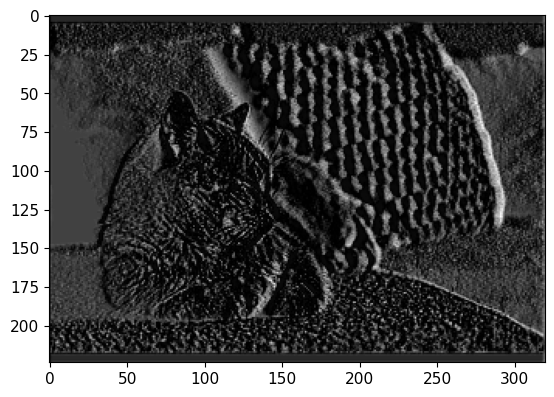

In [7]:
plt.imshow(ret_dict[2][0], cmap='gray')

In [15]:
# cv2.imwrite('test100.jpg', ret[0])

True

In [19]:
import multiprocess

In [10]:
def double(a):
    return a * 2

In [11]:
def driver_func():
    PROCESSES = 4
    with multiprocess.Pool(PROCESSES) as pool:
        params = [(1, ), (2, ), (3, ), (4, )]
        results = [pool.apply_async(double, p) for p in params]

        for r in results:
            print('\t', r.get())
driver_func()

	 2
	 4
	 6
	 8


In [9]:
def square(x):
    print(f"start process:{x}")
    square = x * x
    print(f"square {x}:{square}")
    #time.sleep(1)
    print(f"end process:{x}")


pool = multiprocess.Pool()
pool.map(square, range(0, 5))
pool.close()

In [19]:
def square(x):
    print(f"start process:{x}")
    square = x * x
    print(f"square {x}:{square}")
    time.sleep(1)
    print(f"end process:{x}")

In [20]:
pool = Pool()

In [ ]:
pool.map(square, range(0, 5))
pool.close()

---

## **Vedo Visualization**

In [2]:
from vedo import *
import time
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
settings.default_backend = 'None'
%matplotlib inline

#### Concatenate Data

In [6]:
# rng = np.random.default_rng(seed=42)
# w, h = 640, 448
# data = rng.integers(0, 256, size=(num_img, h, w), dtype=np.uint8)

In [10]:
num_img = 64  # must be devisible by rowbreakAfter
rowbreak_after = 8
padding_width = 5
npad = ((0, 0), (padding_width, padding_width), (padding_width, padding_width))

In [83]:
padded_data = test_map_padded
padded_data = test_map

rows = []
for i in range(0, len(padded_data), rowbreak_after):
    #concatenate arrays along "w" axis
    row = np.concatenate(padded_data[i:i+rowbreak_after], axis=1)
    rows.append(row)
    
img_concat = np.concatenate(rows, axis=0)

In [119]:
test = ret_dict[0]

In [124]:
test.shape

(32, 448, 640)

In [121]:
padded_data = np.pad(test, pad_width=npad, mode='constant', constant_values=255.0)

In [125]:
len(padded_data)

32

In [11]:
def build_img_grid(img_dict, num_img_plot=64, rowbreak_after=8, padding_width=5):
    
    npad = ((0, 0), (padding_width, padding_width), (padding_width, padding_width))
    ret_dict = {}
    
    for key in img_dict.keys():
        # pad data
        # improvement possible: only pad maximum number of num_img_plot
        padded_data = np.pad(img_dict[key], pad_width=npad, mode='constant', constant_values=255.0)
        
        rows = []
        for i in range(0, len(padded_data), rowbreak_after):
            #print(f"Length data = {len(padded_data)} with i = {i}")
            if (i+1) >= num_img_plot:
                #print(f"Breakout with i = {i}")
                break
            # concatenate arrays along "w" axis
            row = np.concatenate(padded_data[i:i+rowbreak_after], axis=1)
            rows.append(row)
        
        # concatenate arrays along "h" axis
        ret_dict[key] = np.concatenate(rows, axis=0)
    
    return ret_dict

In [12]:
#%%timeit
test_collection = tensor_collection
layer_nums = [0,1,2,30,60,90,100,104]
ret_dict = calc_grayscale_dataset(test_collection, layer_nums=layer_nums)
test_img_grid = build_img_grid(ret_dict)

(-0.5, 5199.5, 1831.5, -0.5)

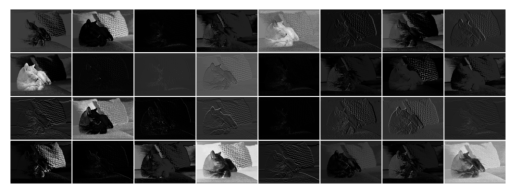

In [30]:
plt.imshow(test_img_grid[0], cmap='gray')
plt.axis("off")

In [13]:
test_img_grid[104].shape

(192, 240)

### ***Results/To-Dos***
- improvement with implementing tensor/array calculation in PyTorch model while using GPU
- testing CuPy (CUDA NumPy implementation) in Colab
    - check performance improvement
- implement Model on GPU in Colab and test if it's functional
- implement PyTorch calculation of feature maps
- maybe implement metadata for feature maps which contain information about the layer's dimension (how much features/images)

#### Real Time Object Detection
- use gpu model to predict in camera live feed
    - use implementation from repo
    - where appopriate add customization

---

In [1]:
from vedo import *
import time
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pickle
import time
settings.default_backend = 'None'
%matplotlib inline

In [2]:
import pickle
# save pickle
def save_pickle(filename, obj):
    with open(str(filename), 'wb') as f:
        pickle.dump(obj, f)
    print("Object saved")
        
# load pickle
def load_pickle(filename):
    with open(str(filename), 'rb') as f:
        obj = pickle.load(f)
    print("Object loaded")
    return obj

In [3]:
#save_pickle('test_img_grid.pkl', test_img_grid)

In [4]:
test_img_grid = load_pickle('test_img_grid.pkl')

Object loaded


## **Vedo**

In [8]:
#%%capture
rng = np.random.default_rng(seed=42)

#create random array of arrays with size 256x256
w, h = 256, 256
paddingWidth = 5
numberOfImages = 256  # must be devisible by rowbreakAfter
rowbreakAfter = 16


def createImage():
    data = rng.integers(0, 256, size=(numberOfImages, h, w), dtype=np.uint8)

    #do not pad allong fist axis, add "paddingWidth" padding to beginning and end of second and third axis  
    npad = ((0, 0), (paddingWidth, paddingWidth), (paddingWidth, paddingWidth))
    padded_data = np.pad(data, pad_width=npad, mode='constant', constant_values=255)

    rows = []
    for i in range(0, numberOfImages, rowbreakAfter):
        #concatenate arrays along "w" axis
        row = np.concatenate(padded_data[i:i+rowbreakAfter], axis=1)
        rows.append(row)
    #concatenate arrays along "h" axis
    return np.concatenate(rows, axis=0)

def bfunc():
    global timer_id
    plotter.timer_callback("destroy", timer_id)
    if "Play" in button.status():
        # instruct to call handle_timer() every 10 msec:
        timer_id = plotter.timer_callback("create", dt=100)
    button.switch()

def handle_timer(event):
    pic = Picture(createImage())
    plotter.remove(plotter.actors).add(pic)


timer_id = None
plotter= Plotter(axes=0)
button = plotter.add_button(bfunc, states=[" Play ","Pause"], size=40)
evntId = plotter.add_callback("timer", handle_timer)

pic = Picture(createImage())


plotter.show(__doc__, pic, mode=8)

renderer = vtkOpenGLRenderer (000001E0CD062CF0)
  Debug: Off
  Modified Time: 596978
  Reference Count: 2
  Registered Events: (none)
  Aspect: (1, 1)
  PixelAspect: (1, 1)
  Background: (1, 1, 1)
  Background2: (0.2, 0.2, 0.2)
  BackgroundAlpha: 0
  GradientBackground: Off
  Viewport: (0, 0, 1, 1)
  Displaypoint: (493, 55, 0)
  Viewpoint: (0.369444, -0.847222, 0)
  Worldpoint: (3205.4, -344.386, 736.109, 1)
  Pick Position X1 Y1: 493 55
  Pick Position X2 Y2: 493 55
  PickedZ: 0
  Props:
    Debug: Off
    Modified Time: 594935
    Reference Count: 1
    Registered Events: (none)
    Number Of Items: 3
  PickResultProps:
    Debug: Off
    Modified Time: 597007
    Reference Count: 1
    Registered Events: (none)
    Number Of Items: 1
  Near Clipping Plane Tolerance: 0.001
  ClippingRangeExpansion: 0.5
  Ambient: (1, 1, 1)
  Backing Store: Off
  Display Point: (493, 55, 0)
  Lights:
    Debug: Off
    Modified Time: 593829
    Reference Count: 1
    Registered Events: (none)
    Numb

In [ ]:
N = len(test_img_grid)
#pic = Picture(test_img_grid[0], flip=True)
plotter = Plotter(N=N, axes=0, size=(1760,990), sharecam=False, title='Feature Map Visualization')
#plotter = Plotter(axes=0)
keys = list(test_img_grid.keys())

def bfunc():
    global timer_id
    plotter.timer_callback("destroy", timer_id)
    if "Start" in button.status():
        # instruct to call handle_timer() every 10 msec:
        timer_id = plotter.timer_callback("create", dt=1000)
    button.switch()

def handle_timer(event):
    global N
    global keys
    #print("Execution...")
    s = time.time()
    #plotter.actors = []
    actors = plotter.actors
    for i, key in enumerate(keys):
        s1 = time.time()
        pic = Picture(test_img_grid[key], flip=True)
        e1 = time.time()
        s2 = time.time()
        #plotter.pop().add(pic)
        #plotter.remove(actors, at=i).at(i).add(pic, f"Layer {keys[i]+1}")
        plotter.at(i).add(pic, f"Layer {keys[i]+1}")
        #plotter.remove(actors).at(i).add(pic, f"Layer {keys[i]+1}")
        #plotter.remove(actors).at(i).add(pic, f"Layer {keys[i]+1}")
        #plotter.remove(plotter.actors).at(i).add(pic, f"Layer {keys[i]+1}")
        #plotter.remove(at=i).at(i).add(pic)
        e2 = time.time()
        #print(f"Time for converting image: {(e1 - s1) * 1000} ms")
        #print(f"Time for display image: {(e2 - s2) * 1000} ms")
        if i == 0:
            renderer = plotter.renderers[i]
            #print(f"Renderer {i} with renderer actors {renderer.GetActors()} and type {type(renderer.GetActors())}")
            #print(f"Renderer {i} with renderer 2D actors {renderer.GetActors2D()} and type {type(renderer.GetActors2D())}")
            #print("#######################################################################################################")
    e = time.time()
    #print(f"Plotter actors length {len(plotter.actors)} and type {type(plotter.actors)}")
    #print(f"Plotter actors {plotter.actors} and type {type(plotter.actors)}")
    #print(f"Time for Timer Handling: {(e - s) * 1000} ms")
    #pic = Picture()
    #plotter.pop().add(pic)
    
def init():
    global N
    global keys
    for i in range(N):
        pic = Picture(test_img_grid[keys[i]], flip=True)
        plotter.at(i).show(pic, f"Layer {keys[i]+1}")
        print(f"Set {plotter.renderer}")
        ren = plotter.renderers[i]
        ren = plotter.renderer
        actor_collection = ren.GetActors()
        #print(f"Amount renderer {ren}: {actor_collection.GetNumberOfItems()}")
        print(f"actors = {plotter.actors}")
        print(f"actors = {plotter.at(0).actors}")
        time.sleep(2)
        plotter.remove_all(at=i, render=True)
        
def close_call():
    global timer_id
    plotter.timer_callback("destroy", timer_id)
    plotter.break_interaction()
    plotter.close()


timer_id = None
#plotter= Plotter(axes=0)
button = plotter.add_button(bfunc, states=["Start","Stop"], pos=(0.5, 0.05), size=10)
button_init = plotter.add_button(init, states=["Init"], pos=(0.3, 0.05), size=10)
button_close = plotter.add_button(close_call, states=["Close"], pos=(0.7, 0.05), size=10)
evntId = plotter.add_callback("timer", handle_timer)


plotter.interactive()
#plotter.close()
# for i in range(N):
#     pic = Picture(test_img_grid[keys[i]], flip=True)
#     plotter.at(i).show(pic)

#plt.interactive().close()

Set vtkOpenGLRenderer (0000019A2E9D1680)
  Debug: Off
  Modified Time: 40537
  Reference Count: 3
  Registered Events: (none)
  Aspect: (0.888889, 1)
  PixelAspect: (1, 1)
  Background: (1, 1, 1)
  Background2: (0.2, 0.2, 0.2)
  BackgroundAlpha: 0
  GradientBackground: Off
  Viewport: (0, 0.5, 0.25, 1)
  Displaypoint: (134, 531, 0)
  Viewpoint: (-0.390909, -0.854545, 0)
  Worldpoint: (-0.000931056, -0.00228975, 0.99, 1)
  Pick Position X1 Y1: 134 531
  Pick Position X2 Y2: 134 531
  PickedZ: 0
  Props:
    Debug: Off
    Modified Time: 40656
    Reference Count: 1
    Registered Events: (none)
    Number Of Items: 6
  PickResultProps:
    Debug: Off
    Modified Time: 39606
    Reference Count: 1
    Registered Events: (none)
    Number Of Items: 1
  Near Clipping Plane Tolerance: 0.001
  ClippingRangeExpansion: 0.5
  Ambient: (1, 1, 1)
  Backing Store: Off
  Display Point: (134, 531, 0)
  Lights:
    Debug: Off
    Modified Time: 37435
    Reference Count: 1
    Registered Events: (no

In [7]:
plotter.renderers

[(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C50A0,
 (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C52E0,
 (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C5340,
 (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C5700,
 (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C56A0,
 (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C5760,
 (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C57C0,
 (vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C5820]

In [8]:
ren = plotter.renderers[1]

In [9]:
ren

(vtkmodules.vtkRenderingOpenGL2.vtkOpenGLRenderer)00000122F54C52E0

In [10]:
actor_collection = ren.GetActors()

In [10]:
actor_collection

(vtkmodules.vtkRenderingCore.vtkActorCollection)000001ADDE8C5E80

In [11]:
actor_collection.GetNumberOfItems()

0

In [42]:
ret = actor_collection.GetNextActor()
ret

In [43]:
print(ret)

None


In [8]:
plotter.renderer.GetActors()

AttributeError: 'NoneType' object has no attribute 'GetActors'

In [7]:
plotter.

(1760, 990)

In [18]:
%%timeit
pic = Picture(test_img_grid[keys[0]], flip=True)

77.3 ms ± 412 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### ***Results/To-Dos***
- Vedo static image batch processing functional
- find ways to run Vedo script as subrpocess with data pipeline
    - model with object detection --> output feature maps with pipeline --> display feature maps in render window

---

## **Vedo Examples**

In [15]:
"""1D Moving Least Squares (MLS)
to project a cloud of unordered points
to become a smooth line"""
from vedo import *
import numpy as np

N = 4  # nr. of iterations

# build some initial cloud of noisy points along a line
pts = [ (sin(6*x), cos(2*x)*x, cos(9*x)) for x in np.arange(0,2, .001)]
# pts = [ (0, sin(x), cos(x)) for x in arange(0,6, .002) ]
# pts = [(sqrt(x), sin(x), x/5) for x in arange(0, 16, 0.01)]

pts += np.random.randn(len(pts), 3) /20  # add noise
np.random.shuffle(pts)  # make sure points are not ordered

pts = Points(pts, r=5)

plt = Plotter(N=N, axes=0)
plt.at(0).show(pts, __doc__)

for i in range(1, N):
    pts = pts.clone().smooth_mls_1d(f=0.4).color(i)

    if i == N-1:
        # at the last iteration make sure points
        # are separated by tol (in % of bbox)
        pts.subsample(0.02)

    plt.at(i).show(pts, f"Iteration {i}, #points: {pts.npoints}")

#time.sleep(3)
plt.interactive().close()

In [ ]:
"""Align 2 shapes: a simple line to a polygonal mesh"""
from vedo import *

# settings.default_backend = '2d' # or k3d, itk, ipyvtk, panel, ipygany, or vtk

limb = Mesh(dataurl + "270.vtk").alpha(0.5)
rim  = Mesh(dataurl + "270_rim.vtk").c("red4").ps(10)

# make a clone copy of the rim line and align it to the surface
arim = rim.clone().align_to(limb, rigid=True).c("g").ps(10)

plt = Plotter()
plt += [limb, rim, arim]

# compute how well it fits
d = 0
for p in arim.points():
    cpt = limb.closest_point(p)
    d += mag2(p - cpt)  # square of residual distance

printc("ave. squared distance =", d / arim.npoints, c="g")
plt.show(axes=1)

In [4]:
from vedo import *
import time
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
settings.default_backend = 'None'
%matplotlib inline

In [6]:
"""Add a square button with N possible internal states
to a rendering window that calls an external function"""

# add a button to the current renderer (e.i. nr1)
def buttonfunc():
    mesh.alpha(1 - mesh.alpha())  # toggle mesh transparency
    bu.switch()                 # change to next status
    printc(bu.status(), box="_", dim=True)
    printc(type(bu))

mesh = Mesh(dataurl+"magnolia.vtk").c("v").flat()

plt = Plotter(axes=11)

bu = plt.add_button(
    buttonfunc,
    pos=(0.7, 0.05),  # x,y fraction from bottom left corner
    states=["click to hide", "click to show"],
    c=["w", "w"],
    bc=["dg", "dv"],  # colors of states
    font="courier",   # arial, courier, times
    size=25,
    bold=True,
    italic=False,
)

plt.show(mesh, __doc__)

click to show
<class 'vedo.addons.Button'>
click to hide
<class 'vedo.addons.Button'>
click to show
<class 'vedo.addons.Button'>
click to hide
<class 'vedo.addons.Button'>


In [4]:
from vedo.pyplot import plot

def bfunc():
    global timer_id
    plotter.timer_callback("destroy", timer_id)
    if "Play" in button.status():
        # instruct to call handle_timer() every 10 msec:
        timer_id = plotter.timer_callback("create", dt=10)
    button.switch()

def handle_timer(event):
    t = time.time() - t0
    x = np.linspace(t, t + 4*np.pi, 50)
    y = np.sin(x) * np.sin(x/12)
    fig = plot(
        x, y, '-o', ylim=(-1.2, 1.2), aspect=3/1,
        xtitle="time window [s]", ytitle="intensity [a.u.]",
    )
    fig.shift(-x[0]) # put the whole plot object back at (0,0)
    # pop (remove) the old plot and add the new one
    plotter.pop().add(fig)


timer_id = None
t0 = time.time()
plotter= Plotter(size=(1200,600))
button = plotter.add_button(bfunc, states=[" Play ","Pause"], size=40)
evntId = plotter.add_callback("timer", handle_timer)

x = np.linspace(0, 4*np.pi, 50)
y = np.sin(x) * np.sin(x/12)
fig = plot(x, y, ylim=(-1.2, 1.2), xtitle="time", aspect=3/1, lc='grey5')

plotter.show(__doc__, fig, zoom=2)

#### *Multiprocessing*

In [1]:
import multiprocess

In [10]:
def double(a):
    return a * 2

In [11]:
def driver_func():
    PROCESSES = 4
    with multiprocess.Pool(PROCESSES) as pool:
        params = [(1, ), (2, ), (3, ), (4, )]
        results = [pool.apply_async(double, p) for p in params]

        for r in results:
            print('\t', r.get())
driver_func()

	 2
	 4
	 6
	 8


In [9]:
def square(x):
    print(f"start process:{x}")
    square = x * x
    print(f"square {x}:{square}")
    #time.sleep(1)
    print(f"end process:{x}")


pool = multiprocess.Pool()
pool.map(square, range(0, 5))
pool.close()

In [19]:
def square(x):
    print(f"start process:{x}")
    square = x * x
    print(f"square {x}:{square}")
    time.sleep(1)
    print(f"end process:{x}")

In [20]:
pool = Pool()

In [ ]:
pool.map(square, range(0, 5))
pool.close()